In [1]:
import pandas as pd
day_1 = pd.read_excel('datas\day1.xlsx')
day_1.head()
day_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 9 columns):
group_id               3844 non-null int64
member_id              3844 non-null int64
start_datetime         3844 non-null object
calendar_start_date    3844 non-null datetime64[ns]
weight                 3844 non-null float64
end_datetime           3844 non-null object
calendar_end_date      3844 non-null datetime64[ns]
location_id            3844 non-null int64
time                   3844 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 270.4+ KB


In [2]:
day_1['weight'].sum().round(2)

4479.55

In [3]:
source = day_1['member_id'].unique()
source
list_source = []
for q in source:
    list_source.append(q)
print(list_source)

[65707, 64906, 40706, 54653, 33577, 58951, 64713, 40858, 64517, 40928, 58556, 58909, 58953, 29814, 56964, 63162, 46513, 63052, 65484, 68653, 64367, 64335, 65958, 66252, 65093, 66469, 52044, 43526, 62310, 52920, 61718, 48716, 63900, 65114, 45873, 54091, 54775, 31266, 31267, 35164, 67872, 35448, 68370, 62882, 62382, 58970, 58971, 60209, 31107, 61431, 62368, 62053, 68470, 57549, 26235, 65881, 54936, 41177, 64227, 36251, 64795, 58844, 66511, 66775, 50209, 62097, 40274, 32999, 32998, 61014, 59691, 66806, 67914, 66974, 31135, 66281, 35334, 56615, 57233, 64763, 48180, 44270, 64881, 66084, 57625, 59792, 59936, 57079, 66808, 61951, 66805, 51563, 29909, 66807, 66694, 31393, 65420, 65007, 65859, 66193, 62221, 63469, 65419, 63513, 63514, 68906, 57097, 57095, 58050, 58679, 58732, 58730, 62478, 56968, 56786, 63014, 28472, 56807, 58731, 56797, 56798, 40493, 61454, 63464, 61029, 63069, 43304, 59104, 63602, 63051, 62951, 63710, 60873, 63471, 64079, 48114, 65283, 36884, 65284, 64873, 66814, 47016, 31589

In [4]:
day_2 = pd.read_excel('datas\day2.xlsx')
day_2.head()
day_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 9 columns):
group_id               4841 non-null int64
member_id              4841 non-null int64
start_datetime         4841 non-null object
calendar_start_date    4841 non-null datetime64[ns]
weight                 4841 non-null float64
end_datetime           4841 non-null object
calendar_end_date      4841 non-null datetime64[ns]
location_id            4841 non-null int64
time                   4841 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 340.5+ KB


In [5]:
result = pd.concat([day_1,day_2]).drop_duplicates('member_id').sort_values('member_id').reset_index(drop=True)
result.head(5)

,group_id,member_id,start_datetime,calendar_start_date,weight,end_datetime,calendar_end_date,location_id,time
0,1,16321,2021-03-02 23:14:05,2021-03-02 23:07:00,0.653093,2021-03-02 23:14:25,2021-03-02 23:35:00,1,20
1,1,18802,2021-03-02 14:39:10,2021-03-02 14:21:00,1.495599,2021-03-02 14:39:30,2021-03-02 14:40:00,1,20
2,1,18862,2021-03-02 18:26:01,2021-03-02 17:56:00,0.203072,2021-03-02 18:26:21,2021-03-02 18:37:00,1,20
3,1,19062,2021-03-01 21:56:22,2021-03-01 21:36:00,0.574552,2021-03-01 21:56:42,2021-03-01 22:27:00,1,20
4,1,19242,2021-03-01 20:54:23,2021-03-01 19:58:00,0.683945,2021-03-01 20:54:43,2021-03-01 21:05:00,1,20


In [6]:
result1 = pd.concat([day_1,day_2]).sort_values('member_id').reset_index(drop=True)
result1['location_id'] = result1.location_id.apply(lambda x: 'дом' if x == 1 else('дача' if x == 2 
                        else('гостиница' if x == 4
                        else('гараж' if x == 8 else x))))

In [7]:
result1.loc[311:314]

,group_id,member_id,start_datetime,calendar_start_date,weight,end_datetime,calendar_end_date,location_id,time
311,1,28903,2021-03-02 17:37:23,2021-03-02 17:30:00,0.711889,2021-03-02 17:37:43,2021-03-02 17:47:00,дом,20
312,1,28903,2021-03-02 10:47:00,2021-03-02 09:02:00,0.711889,2021-03-02 10:47:20,2021-03-02 11:59:00,дача,20
313,1,28925,2021-03-01 07:34:20,2021-03-01 07:31:00,0.356140,2021-03-01 07:34:40,2021-03-01 07:55:00,дом,20
314,1,28929,2021-03-01 23:50:33,2021-03-01 22:46:00,0.266551,2021-03-01 23:50:53,2021-03-01 23:51:00,дом,20


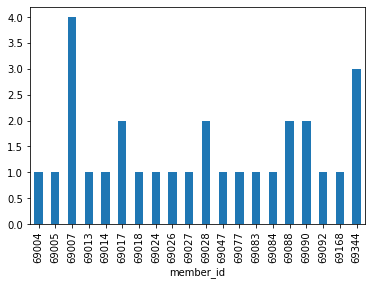

In [9]:
result1.groupby('member_id').size().tail(20).plot(kind='bar')

In [11]:
table = result1.groupby('member_id').size()
table.to_excel('datas\DAY.xlsx')